<a href="https://colab.research.google.com/github/asegura4488/MetodosComputacionalesI2025/blob/main/Semana4/Interpolacion1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [2]:
X = np.array([-2.,-0.5,0.,1.,3.,4.])
Y = np.array([-1.,3.,0.,2.,5.,-7.5])

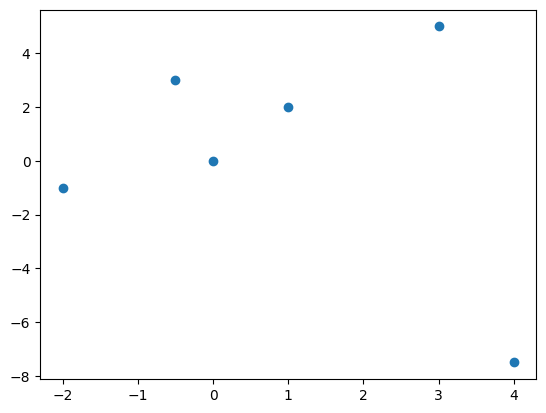

In [3]:
plt.scatter(X,Y)

In [4]:
# Queremos crear las bases cardinales sobre el soporte
def Lagrange(x,X,i):

  L = 1
  for j in range(len(X)):
    if i != j:
      L *= (x - X[j])/(X[i]-X[j])

  return L

In [5]:
x = sym.Symbol('x',real=True)
Lagrange(x,X,0)

-0.5*x*(0.333333333333333 - 0.333333333333333*x)*(0.6 - 0.2*x)*(0.666666666666667 - 0.166666666666667*x)*(-0.666666666666667*x - 0.333333333333333)

In [6]:
Lagrange(x,X,1).simplify()

1.33333333333333*x*(0.222222222222222*x - 0.888888888888889)*(0.285714285714286*x - 0.857142857142857)*(0.666666666666667*x + 1.33333333333333)*(x - 1)

In [7]:
Lagrange(x,X,0).subs(x,X[0])

1.00000000000000

In [8]:
Lagrange(x,X,1).subs(x,X[2])

0

In [9]:
def Interpolate(x,X,Y):

  Poly = 0
  for i in range(len(X)):
    Poly += Y[i]*Lagrange(x,X,i)

  return Poly

In [10]:
poly = Interpolate(x,X,Y).simplify()
poly

x*(0.176322751322751*x**4 - 1.22321428571429*x**3 + 0.726190476190476*x**2 + 5.77744708994709*x - 3.45674603174603)

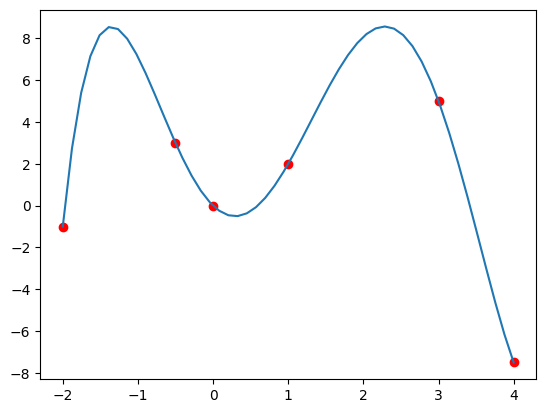

In [11]:
x1 = np.linspace(X[0],X[-1],50)
y1 = Interpolate(x1,X,Y)

plt.scatter(X,Y,color='r')
plt.plot(x1,y1)

In [12]:
# Vamos convertir la expresión algebraica a una función de numpy
f = sym.lambdify([x],poly,'numpy')

In [13]:
f(-1.6)

7.481246814814788

In [14]:
dpoly = sym.diff(poly,x,1)
dpoly

0.176322751322751*x**4 - 1.22321428571429*x**3 + 0.726190476190476*x**2 + x*(0.705291005291005*x**3 - 3.66964285714286*x**2 + 1.45238095238095*x + 5.77744708994709) + 5.77744708994709*x - 3.45674603174603

In [15]:
df = sym.lambdify([x],dpoly,'numpy')

In [28]:
def Derivative(f,x,h=1e-5):
  return (f(x+h)-f(x-h))/(2*h)

In [29]:
dfn = Derivative(f,x1)

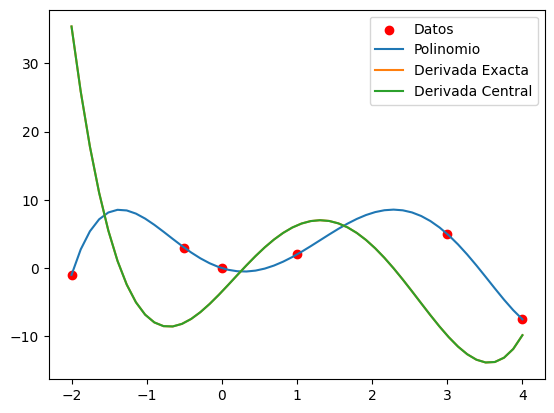

In [30]:
plt.scatter(X,Y,color='r',label='Datos')
plt.plot(x1,y1,label='Polinomio')
plt.plot(x1,dfn,label='Derivada Exacta')
plt.plot(x1,df(x1),label='Derivada Central')
plt.legend()

np.float64(2.5400197500857757e-09)

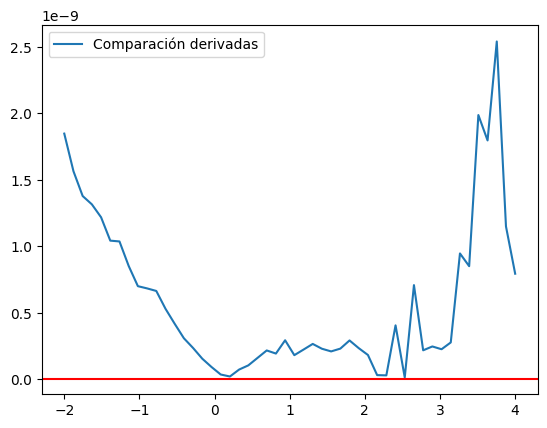

In [31]:
plt.plot(x1,np.abs(dfn-df(x1)),label='Comparación derivadas')
plt.axhline(y=0.,color='r')
plt.legend()
np.max(np.abs(dfn-df(x1)))